### Importing Necessary Libraries

In [121]:
# for data handling
import pandas as pd
import numpy as np

# for charts
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for stats test
import scipy.stats as stats

In [122]:
# veiw profile report
# pip install pandas_profiling
#import pandas_profiling

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

### Creating UDFs for understanding data or just required knowledge what we want from data

In [124]:
# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [125]:
# Create Data audit Report for categorical variables
def categorical_var_summary(x):
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100/x.count(), 2)], 
                  index = ['N', 'NMISS', 'MODE', 'FREQ', 'PERCENT'])

In [126]:
# Missing value imputation for categorical and continuous variables
def missing_imputation(x, stats = 'mean'):
    if (x.dtypes == 'float64') | (x.dtypes == 'int64'):
        x = x.fillna(x.mean()) if stats == 'mean' else x.fillna(x.median())
    else:
        x = x.fillna(x.mode())
    return x

In [127]:
# Missing value imputation for categorical and continuous variables
def missing_imputation_ordinal(x, stats = 'mean'):
    x = x.fillna(x.mode())
    return x

In [128]:
# An utility function to create dummy variable
def create_dummies(df, colname):
    col_dummies = pd.get_dummies(df[colname], prefix = colname, drop_first = True)
    df = pd.concat([df, col_dummies], axis = 1)
    df.drop(colname, axis = 1, inplace = True )
    return df

### Importing Data

In [129]:
data=pd.read_excel("Worksheet in Analytics_Case_Resolvr2020 (1).xlsx",sheet_name="Case Study 2020")

In [131]:
data.head()

,Customer ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3.0,4.0,3.0,...,5.0,4.0,3.0,4.0,4.0,5.0,5.0,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3.0,2.0,3.0,...,1.0,1.0,5.0,3.0,1.0,4.0,1.0,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2.0,2.0,2.0,...,5.0,4.0,3.0,4.0,4.0,4.0,5.0,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2.0,5.0,5.0,...,2.0,2.0,5.0,3.0,1.0,4.0,2.0,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3.0,3.0,3.0,...,3.0,3.0,4.0,4.0,3.0,3.0,3.0,0,0.0,1


### Data Inspection

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Customer ID                        129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129876 non-null  float64
 8   Departure/Arrival time convenient  129876 non-null  float64
 9   Ease of Online booking             129877 non-null  float64
 10  Gate location                      129872 non-null  float64
 11  Food and drink                     1298

In [133]:
data.describe()

,Customer ID,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,129880.000000,129880.000000,129880.000000,129876.000000,129876.000000,129877.000000,129872.000000,129875.000000,129874.000000,129879.000000,129876.000000,129877.000000,129878.000000,129878.000000,129877.000000,129879.000000,129878.000000,129880.000000,129487.000000,129880.000000
mean,64940.500000,39.427957,1190.316392,2.728703,3.057609,2.756885,2.976931,3.204805,3.252599,3.441349,3.358080,3.383016,3.350891,3.632132,3.306251,3.642213,3.286315,14.713713,15.091129,0.434463
std,37493.270818,15.119360,997.452477,1.329334,1.526757,1.401742,1.278526,1.329917,1.350718,1.319287,1.334033,1.287106,1.316245,1.180024,1.266189,1.176651,1.313689,38.071126,38.465650,0.495688
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [134]:
# profiling using pandas profiling
#report = pandas_profiling.ProfileReport(cars)

In [135]:
# export the file as html
# screen the variables to get rid of unuseful variable sin the begining or
# make a note of potential variables for model refinement
#report.to_file(output_file = 'profilereport.html')

In [136]:
data.columns

Index(['Customer ID', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [137]:
# seperate categorical and continuous variables
data_conti_vars = data.loc[:, (data.dtypes == 'float64') | (data.dtypes == 'int64')]
data_cat_vars = data.loc[:, (data.dtypes == 'object')]

# Simper way of doing:
# data_conti_vars = data.select_dtypes(include = ['float64', 'int64'])
# data_sales_cat = data.select_dtypes(include = ['object'])

In [138]:
data_conti_vars.apply(continuous_var_summary).T.round(1)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Customer ID,129880.0,0.0,8.434472e+09,64940.5,64940.5,37493.3,1.405745e+09,1.0,1299.8,6495.0,12988.9,32470.8,64940.5,97410.2,116892.1,123386.0,128581.2,129880.0
Age,129880.0,0.0,5.120903e+06,39.4,40.0,15.1,2.286000e+02,7.0,8.0,15.0,20.0,27.0,40.0,51.0,59.0,64.0,70.0,85.0
Flight Distance,129880.0,0.0,1.545983e+08,1190.3,844.0,997.5,9.949114e+05,31.0,101.0,177.0,236.0,414.0,844.0,1744.0,2751.0,3380.0,3884.0,4983.0
Inflight wifi service,129876.0,4.0,3.543930e+05,2.7,3.0,1.3,1.800000e+00,0.0,0.0,1.0,1.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0
Departure/Arrival time convenient,129876.0,4.0,3.971100e+05,3.1,3.0,1.5,2.300000e+00,0.0,0.0,0.0,1.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0
Ease of Online booking,129877.0,3.0,3.580560e+05,2.8,3.0,1.4,2.000000e+00,0.0,0.0,1.0,1.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0
Gate location,129872.0,8.0,3.866200e+05,3.0,3.0,1.3,1.600000e+00,0.0,1.0,1.0,1.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0
Food and drink,129875.0,5.0,4.162240e+05,3.2,3.0,1.3,1.800000e+00,0.0,1.0,1.0,1.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0
Online boarding,129874.0,6.0,4.224280e+05,3.3,3.0,1.4,1.800000e+00,0.0,0.0,1.0,1.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0
Seat comfort,129879.0,1.0,4.469590e+05,3.4,4.0,1.3,1.700000e+00,0.0,1.0,1.0,1.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0


In [139]:
data_cat_vars.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
Gender,129880,0,Female,65899,50.74
Customer Type,129880,0,Loyal Customer,106100,81.69
Type of Travel,129880,0,Business travel,89693,69.06
Class,129880,0,Business,62160,47.86


In [140]:
data_cat_vars = data_cat_vars.applymap(lambda x: str(x).replace(' ', '_')) # This step is done because while creating dummy variables, no special character is allowed other than underscore

### Outlier Treatment

In [141]:
data_conti_vars = data_conti_vars.apply(lambda x: x.clip(lower = x.dropna().quantile(0.01), 
                                                         upper = x.quantile(0.99)))

In [142]:
data_conti_vars.apply(continuous_var_summary).T.round(1)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Customer ID,129880.0,0.0,8.434472e+09,64940.5,64940.5,37471.1,1.404080e+09,1299.8,1300.0,6495.0,12988.9,32470.8,64940.5,97410.2,116892.1,123386.0,128581.0,128581.2
Age,129880.0,0.0,5.116754e+06,39.4,40.0,15.0,2.257000e+02,8.0,8.0,15.0,20.0,27.0,40.0,51.0,59.0,64.0,70.0,70.0
Flight Distance,129880.0,0.0,1.544882e+08,1189.5,844.0,994.3,9.886989e+05,101.0,101.0,177.0,236.0,414.0,844.0,1744.0,2751.0,3380.0,3884.0,3884.0
Inflight wifi service,129876.0,4.0,3.543930e+05,2.7,3.0,1.3,1.800000e+00,0.0,0.0,1.0,1.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0
Departure/Arrival time convenient,129876.0,4.0,3.971100e+05,3.1,3.0,1.5,2.300000e+00,0.0,0.0,0.0,1.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0
Ease of Online booking,129877.0,3.0,3.580560e+05,2.8,3.0,1.4,2.000000e+00,0.0,0.0,1.0,1.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0
Gate location,129872.0,8.0,3.866210e+05,3.0,3.0,1.3,1.600000e+00,1.0,1.0,1.0,1.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0
Food and drink,129875.0,5.0,4.163560e+05,3.2,3.0,1.3,1.800000e+00,1.0,1.0,1.0,1.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0
Online boarding,129874.0,6.0,4.224280e+05,3.3,3.0,1.4,1.800000e+00,0.0,0.0,1.0,1.0,2.0,3.0,4.0,5.0,5.0,5.0,5.0
Seat comfort,129879.0,1.0,4.469600e+05,3.4,4.0,1.3,1.700000e+00,1.0,1.0,1.0,1.0,2.0,4.0,5.0,5.0,5.0,5.0,5.0


### Missing Value Treatment

In [143]:
data_conti_vars = data_conti_vars.apply(missing_imputation)
data_cat_vars = data_cat_vars.apply(missing_imputation)

In [144]:
data_conti_vars.apply(continuous_var_summary).T.round(3)

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
Customer ID,129880.0,0.0,8.434472e+09,64940.500,64940.5,37471.052,1.404080e+09,1299.79,1299.956,6494.95,12988.9,32470.75,64940.5,97410.25,116892.1,123386.05,128581.044,128581.21
Age,129880.0,0.0,5.116754e+06,39.396,40.0,15.024,2.257070e+02,8.00,8.000,15.00,20.0,27.00,40.0,51.00,59.0,64.00,70.000,70.00
Flight Distance,129880.0,0.0,1.544882e+08,1189.469,844.0,994.333,9.886989e+05,101.00,101.000,176.95,236.0,414.00,844.0,1744.00,2751.0,3380.00,3884.000,3884.00
Inflight wifi service,129880.0,0.0,3.544039e+05,2.729,3.0,1.329,1.767000e+00,0.00,0.000,1.00,1.0,2.00,3.0,4.00,5.0,5.00,5.000,5.00
Departure/Arrival time convenient,129880.0,0.0,3.971222e+05,3.058,3.0,1.527,2.331000e+00,0.00,0.000,0.00,1.0,2.00,3.0,4.00,5.0,5.00,5.000,5.00
Ease of Online booking,129880.0,0.0,3.580643e+05,2.757,3.0,1.402,1.965000e+00,0.00,0.000,1.00,1.0,2.00,3.0,4.00,5.0,5.00,5.000,5.00
Gate location,129880.0,0.0,3.866448e+05,2.977,3.0,1.278,1.634000e+00,1.00,1.000,1.00,1.0,2.00,3.0,4.00,5.0,5.00,5.000,5.00
Food and drink,129880.0,0.0,4.163720e+05,3.206,3.0,1.328,1.763000e+00,1.00,1.000,1.00,1.0,2.00,3.0,4.00,5.0,5.00,5.000,5.00
Online boarding,129880.0,0.0,4.224475e+05,3.253,3.0,1.351,1.824000e+00,0.00,0.000,1.00,1.0,2.00,3.0,4.00,5.0,5.00,5.000,5.00
Seat comfort,129880.0,0.0,4.469634e+05,3.441,4.0,1.319,1.740000e+00,1.00,1.000,1.00,1.0,2.00,4.0,5.00,5.0,5.00,5.000,5.00


In [145]:
data_cat_vars.apply(categorical_var_summary).T

,N,NMISS,MODE,FREQ,PERCENT
Gender,129880,0,Female,65899,50.74
Customer Type,129880,0,Loyal_Customer,106100,81.69
Type of Travel,129880,0,Business_travel,89693,69.06
Class,129880,0,Business,62160,47.86


### Creating dummy variables for categorical(nominal) variables

In [146]:
data['Gender'].value_counts() #checking cardinality

Female    65899
Male      63981
Name: Gender, dtype: int64

In [147]:
data['Customer Type'].value_counts() #checking cardinality

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

In [148]:
data['Class'].value_counts() #checking cardinality

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

In [149]:
# for c_feature in categorical_features
for c_feature in data_cat_vars.columns:
    data_cat_vars[c_feature] = data_cat_vars[c_feature].astype('category')
    data_cat_vars = create_dummies(data_cat_vars, c_feature)

In [150]:
data_cat_vars.head()

,Gender_Male,Customer Type_disloyal_Customer,Type of Travel_Personal_Travel,Class_Eco,Class_Eco_Plus
0,1,0,1,0,1
1,1,1,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,1,0,0,0,0


### Final Data for Analysis

In [151]:
data_new = pd.concat([data_conti_vars, data_cat_vars], axis = 1)

In [152]:
data_new.head()

,Customer ID,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal_Customer,Type of Travel_Personal_Travel,Class_Eco,Class_Eco_Plus
0,70172.0,13,460,3.0,4.0,3.0,1.0,5.0,3.0,5.0,...,5.0,5.0,25,18.0,0,1,0,1,0,1
1,5047.0,25,235,3.0,2.0,3.0,3.0,1.0,3.0,1.0,...,4.0,1.0,1,6.0,0,1,1,0,0,0
2,110028.0,26,1142,2.0,2.0,2.0,2.0,5.0,5.0,5.0,...,4.0,5.0,0,0.0,1,0,0,0,0,0
3,24026.0,25,562,2.0,5.0,5.0,5.0,2.0,2.0,2.0,...,4.0,2.0,11,9.0,0,0,0,0,0,0
4,119299.0,61,214,3.0,3.0,3.0,3.0,4.0,5.0,5.0,...,3.0,3.0,0,0.0,1,1,0,0,0,0


In [153]:
data_new.shape

(129880, 25)

In [154]:
data_new=data_new.drop("Customer ID",axis=1)

In [155]:
data_new.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Gender_Male,Customer Type_disloyal_Customer,Type of Travel_Personal_Travel,Class_Eco,Class_Eco_Plus
0,13,460,3.0,4.0,3.0,1.0,5.0,3.0,5.0,5.0,...,5.0,5.0,25,18.0,0,1,0,1,0,1
1,25,235,3.0,2.0,3.0,3.0,1.0,3.0,1.0,1.0,...,4.0,1.0,1,6.0,0,1,1,0,0,0
2,26,1142,2.0,2.0,2.0,2.0,5.0,5.0,5.0,5.0,...,4.0,5.0,0,0.0,1,0,0,0,0,0
3,25,562,2.0,5.0,5.0,5.0,2.0,2.0,2.0,2.0,...,4.0,2.0,11,9.0,0,0,0,0,0,0
4,61,214,3.0,3.0,3.0,3.0,4.0,5.0,5.0,3.0,...,3.0,3.0,0,0.0,1,1,0,0,0,0


In [156]:
data_new.shape

(129880, 24)

### Splitting Data

In [160]:
#Splitting the data

feature_columns = data_new.columns.difference( ['satisfaction'] )
#feature_columns1 = feature_columns

In [161]:
feature_columns

Index(['Age', 'Arrival Delay in Minutes', 'Baggage handling',
       'Checkin service', 'Class_Eco', 'Class_Eco_Plus', 'Cleanliness',
       'Customer Type_disloyal_Customer', 'Departure Delay in Minutes',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Flight Distance', 'Food and drink', 'Gate location', 'Gender_Male',
       'Inflight entertainment', 'Inflight service', 'Inflight wifi service',
       'Leg room service', 'On-board service', 'Online boarding',
       'Seat comfort', 'Type of Travel_Personal_Travel'],
      dtype='object')

In [162]:
from sklearn.model_selection import train_test_split


train_X, test_X, train_y, test_y = train_test_split( data_new[feature_columns],
                                                  data_new['satisfaction'],
                                                  test_size = 0.3,
                                                  random_state = 123 )

### Building Logistic Regression Model

In [163]:
# Building Models
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_X, train_y)

C:\Users\RAHUL CHHIKARA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [164]:
#Predicting the test cases
data_new_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )

In [165]:
data_new_test_pred =data_new_test_pred.reset_index()

In [166]:
data_new_test_pred

,index,actual,predicted
0,28551,0,0
1,64771,0,0
2,86495,1,1
3,113447,1,1
4,123276,0,0
...,...,...,...
38959,18465,1,1
38960,87937,0,0
38961,69308,1,0
38962,123133,1,1


In [167]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( data_new_test_pred.actual,
                            data_new_test_pred.predicted, [1,0] )
cm

array([[14008,  2751],
       [ 2192, 20013]], dtype=int64)

In [168]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5, 15.0, 'Predicted label')

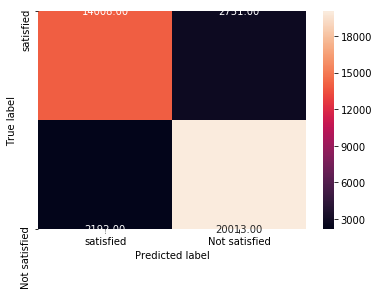

In [169]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["satisfied", "Not satisfied"] , yticklabels = ["satisfied", "Not satisfied"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [170]:
score = metrics.accuracy_score( data_new_test_pred.actual, data_new_test_pred.predicted )
round( float(score), 2 )

0.87

In [171]:
#How good the model is?
predict_proba_data_new = pd.DataFrame( logreg.predict_proba( test_X ) )
predict_proba_data_new.head()

,0,1
0,0.987226,0.012774
1,0.906595,0.093405
2,0.058392,0.941608
3,0.075700,0.924300
4,0.738608,0.261392


In [172]:
data_new_test_pred = pd.concat( [data_new_test_pred, predict_proba_data_new], axis = 1 )

In [173]:
data_new_test_pred.columns = ['index', 'actual', 'predicted', 'satisfied_0', 'satisfied_1']

In [174]:
auc_score = metrics.roc_auc_score( data_new_test_pred.actual, data_new_test_pred.satisfied_1  )
round( float( auc_score ), 2 )

0.93

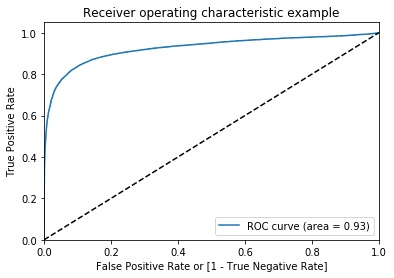

In [175]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( data_new_test_pred.actual,
                                     data_new_test_pred.satisfied_1,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [176]:
tpr[np.abs(tpr - 0.7).argmin()]

0.699982099170595

In [177]:
cutoff_prob = thresholds[(np.abs(tpr - 0.699982099170595)).argmin()]

In [178]:
round( float( cutoff_prob ), 2 )

0.75

In [179]:
#Predicting with new cut-off probability
data_new_test_pred['new_labels'] = data_new_test_pred['satisfied_1'].map( lambda x: 1 if x >= 0.75 else 0 )

In [180]:
metrics.accuracy_score( data_new_test_pred.actual, data_new_test_pred['new_labels'])

0.8567908838928241

In [182]:
auc_score = metrics.roc_auc_score(data_new_test_pred.actual, data_new_test_pred['new_labels'])
round( float( auc_score ), 2 )

0.84

Text(0.5, 15.0, 'Predicted label')

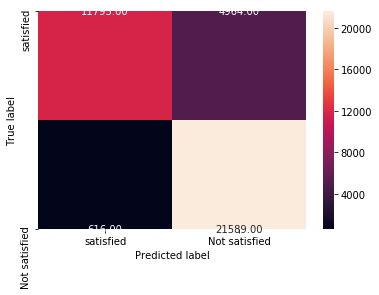

In [181]:
cm = metrics.confusion_matrix( data_new_test_pred.actual,
                          data_new_test_pred.new_labels, [1,0] )
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["satisfied", "Not satisfied"] , yticklabels = ["satisfied", "Not satisfied"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

Customers who is not satisfied but model predicted them satisfied reduces significantly.

### Building Decision Tree Model

In [58]:
import sklearn.tree as dt

In [59]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.model_selection import GridSearchCV

#### Fine Tuning the parameters

In [60]:
train_X.shape

(90916, 23)

In [61]:
train_y.shape

(90916,)

In [238]:
param_grid = {'max_depth': np.arange(2, 12),
             'max_features': np.arange(10,23)}

In [240]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,verbose=1,n_jobs=-1)
tree.fit( train_X, train_y )

Fitting 10 folds for each of 130 candidates, totalling 1300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 1300 out of 1300 | elapsed: 10.6min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'max_features': array([10

In [241]:
tree.best_score_

0.9468630384090809

In [242]:
tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
                       max_features=22, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [243]:
tree.best_params_

{'max_depth': 11, 'max_features': 22}

In [244]:
train_pred = tree.predict(train_X)

In [245]:
print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     51247
           1       0.97      0.93      0.95     39669

    accuracy                           0.96     90916
   macro avg       0.96      0.95      0.95     90916
weighted avg       0.96      0.96      0.95     90916



In [246]:
test_pred = tree.predict(test_X)

In [247]:
print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96     22205
           1       0.96      0.92      0.94     16759

    accuracy                           0.95     38964
   macro avg       0.95      0.95      0.95     38964
weighted avg       0.95      0.95      0.95     38964



### Building Final Decision Tree Model

In [254]:
clf_tree = DecisionTreeClassifier( max_depth = 11, max_features=22)
clf_tree.fit( train_X, train_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=11,
                       max_features=22, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [255]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_X ) } )

In [256]:
tree_test_pred.sample( n = 10 )

,actual,predicted
5080,0,0
80035,0,0
29925,1,1
95488,0,0
33384,1,1
78267,0,0
61885,0,0
3571,1,1
43419,1,1
103022,0,0


In [257]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.9471306847346268

Text(0.5, 15.0, 'Predicted label')

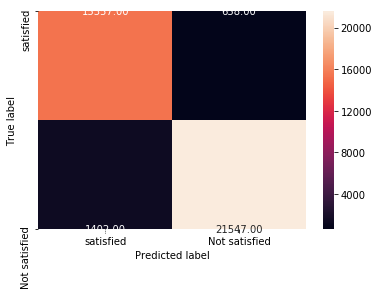

In [258]:
tree_cm = metrics.confusion_matrix( tree_test_pred.actual,
                                 tree_test_pred.predicted,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["satisfied", "Not satisfied"] , yticklabels = ["satisfied", "Not satisfied"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [259]:
metrics.roc_auc_score( tree_test_pred.actual, tree_test_pred.predicted )

0.9433552458492762

### Bagged decision trees

In [260]:
from sklearn.ensemble import BaggingClassifier

In [261]:
bagclm = BaggingClassifier(oob_score=True, n_estimators=100, verbose=0, n_jobs=-1)
bagclm.fit(train_X, train_y)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=100,
                  n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                  warm_start=False)

In [262]:
bagclm.oob_score_   # out of bag score

0.9595120770821418

In [263]:
y_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': bagclm.predict( test_X) } )

In [264]:
print(metrics.accuracy_score( y_pred.actual, y_pred.predicted ))
print(metrics.roc_auc_score( y_pred.actual, y_pred.predicted ))

0.9615029257776408
0.9589943659883758


In [100]:
tree_bg = metrics.confusion_matrix( y_pred.actual,
                                 y_pred.predicted,
                                 [1,0] )
sn.heatmap(tree_bg, annot=True,
         fmt='.2f',
         xticklabels = ["satisfied", "Not satisfied"] , yticklabels = ["satisfied", "Not satisfied"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

NameError: name 'y_pred' is not defined

#### Validating model using different number of trees to be built 

In [266]:
pargrid_bagging = {'n_estimators': [20,50,100,200,250,300,350,400]}

gscv_bagging = GridSearchCV(estimator=BaggingClassifier(), 
                        param_grid=pargrid_bagging, 
                        cv=5,
                        verbose=1, n_jobs=-1)

In [267]:
gscv_results = gscv_bagging.fit(train_X, train_y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 45.1min finished


In [268]:
gscv_results.best_params_

{'n_estimators': 200}

In [269]:
gscv_results.best_score_

0.9604580051916054

In [270]:
y_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': gscv_results.predict( test_X) } )

In [271]:
print(metrics.accuracy_score( y_pred.actual, gscv_results.predict( test_X)))
print(metrics.roc_auc_score( y_pred.actual, gscv_results.predict( test_X)))

0.9609383020223796
0.9584404439486309


### BUILDING RANDOM FOREST MODEL

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
pargrid_rf = {'n_estimators': [50, 60, 70, 80, 90, 100],
                  'max_features': [5,6,7,8,9,10,11,12]}

#from sklearn.grid_search import GridSearchCV
gscv_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_rf, 
                        cv=10,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(train_X, train_y)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 24.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 69.0min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 77.8min finished


In [73]:
gscv_results.best_params_

{'max_features': 9, 'n_estimators': 100}

In [65]:
gscv_rf.best_score_

0.9635047736372035

In [94]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100, max_features=9, n_jobs=-1)
radm_clf.fit( train_X, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=9, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [95]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_X ) } )

In [96]:
print(metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted ))
print(metrics.roc_auc_score( radm_test_pred.actual, radm_test_pred.predicted ))

0.9644287034185401
0.9619418531670058


Text(0.5, 15.0, 'Predicted label')

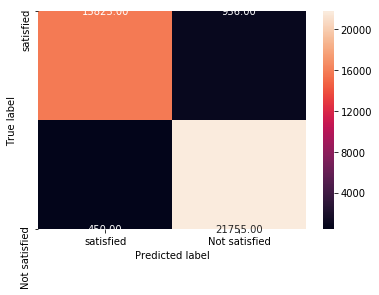

In [99]:
tree_cm = metrics.confusion_matrix( radm_test_pred.actual,
                                 radm_test_pred.predicted,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["satisfied", "Not satisfied"] , yticklabels = ["satisfied", "Not satisfied"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

#### Feature importance from the Random Forest Model

In [70]:
print(radm_clf.feature_importances_)
print(np.argsort(radm_clf.feature_importances_))

[0.02798647 0.01094186 0.02310665 0.02293448 0.07149706 0.00543902
 0.02220235 0.04083351 0.00959384 0.01228086 0.03166038 0.03028457
 0.00895676 0.01363797 0.00347316 0.0571173  0.02041797 0.14845892
 0.03202536 0.02512088 0.21801776 0.04871583 0.11529704]
[14  5 12  8  1  9 13 16  6  3  2 19  0 11 10 18  7 21 15  4 22 17 20]


In [71]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

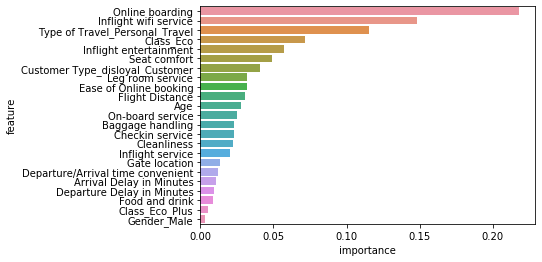

In [72]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )

### BUILDING BOOSTING MODEL

### Ada Boosting

In [1]:
from sklearn.ensemble import AdaBoostClassifier

In [2]:
pargrid_ada = {'n_estimators': [100, 200,250,300,350,400],
               'learning_rate': [10 ** x for x in range(-1, 3)]}

In [3]:
from sklearn.model_selection import GridSearchCV
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=1, n_jobs=-1)

In [43]:
gscv_ada.fit(train_X, train_y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 23.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1, 10, 100],
                         'n_estimators': [100, 200, 250, 300, 350, 400]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [44]:
gscv_ada.best_params_

{'learning_rate': 1, 'n_estimators': 350}

In [45]:
gscv_ada.best_score_

0.9292973733996216

In [46]:
clf_ada = gscv_ada.best_estimator_

In [48]:
ad=clf_ada.fit(train_X, train_y )

In [49]:
print(metrics.accuracy_score(test_y,ad.predict(test_X)))
print(metrics.roc_auc_score(test_y,ad.predict(test_X)))

0.9297300071861205
0.9278176752625626


### Gradient Boosting

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
pargrid_gbm = {'n_estimators': [350,400,450,500],
               'learning_rate': [10 ** x for x in range(-3, 1)],
                'max_features': [7,8,9,10,11,12]}

In [56]:
from sklearn.model_selection import GridSearchCV
gscv_gbm = GridSearchCV(estimator=GradientBoostingClassifier(), 
                        param_grid=pargrid_gbm, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [57]:
gscv_gbm.fit(train_X, train_y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 65.8min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 150.5min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 165.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [58]:
gscv_gbm.best_params_

{'learning_rate': 0.1, 'max_features': 12, 'n_estimators': 500}

In [59]:
gbm = gscv_gbm.best_estimator_

In [60]:
gscv_gbm.best_score_

0.9577192133397862

In [61]:
gbm.fit(train_X, train_y )

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=12, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [62]:
print(metrics.accuracy_score(test_y,gbm.predict(test_X)))
print(metrics.roc_auc_score(test_y,gbm.predict(test_X)))

0.9576788830715532
0.9553246234057423


### Xtreme Gradient Boosting

In [63]:
#!pip install xgboost

In [64]:
from xgboost import XGBClassifier

In [65]:
pargrid_xgbm = {'n_estimators': [200, 250, 300, 400, 500],
               'learning_rate': [10 ** x for x in range(-3, 1)],
                'max_features': [5,6,7,8,9,10]}

In [66]:
#from sklearn.model_selection import GridSearchCV
gscv_xgbm = GridSearchCV(estimator=XGBClassifier(), 
                        param_grid=pargrid_xgbm, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [67]:
gscv_xgbm.fit(train_X, train_y)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 60.9min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 145.8min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 201.0min finished


[19:11:49] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constrai...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             iid='war

In [68]:
gscv_xgbm.best_params_

{'learning_rate': 0.1, 'max_features': 5, 'n_estimators': 250}

In [69]:
xgbm = gscv_xgbm.best_estimator_

In [70]:
gscv_gbm.best_score_

0.9577192133397862

In [71]:
xgbm.fit(train_X, train_y)

[19:12:11] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { max_features } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6, max_features=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
print(metrics.accuracy_score(test_y,xgbm.predict(test_X)))
print(metrics.roc_auc_score(test_y,xgbm.predict(test_X)))

0.9626578380043117
0.960278390076553


### BUILDING KNN MODEL

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
tuned_parameters = [{'n_neighbors': [3,5,7,9,11,13]}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                scoring='roc_auc',
                      n_jobs=-1)

In [75]:
knn_clf.fit(train_X, train_y )

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid=[{'n_neighbors': [3, 5, 7, 9, 11, 13]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [76]:
print(knn_clf.best_score_)
print(metrics.roc_auc_score( train_y, knn_clf.predict( train_X )))

0.8006382395296169
0.7828146888318759


In [77]:
knn_clf.best_params_

{'n_neighbors': 11}

In [84]:
knn_clf = KNeighborsClassifier( n_neighbors =11 )

In [85]:
knn_clf.fit( train_X, train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [86]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(test_y, knn_clf.predict( test_X )))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79     22205
           1       0.73      0.66      0.70     16759

    accuracy                           0.75     38964
   macro avg       0.75      0.74      0.74     38964
weighted avg       0.75      0.75      0.75     38964



In [87]:
accuracy=metrics.accuracy_score( test_y, knn_clf.predict( test_X ) )
AUC=metrics.roc_auc_score( test_y, knn_clf.predict( test_X ))

print("KNN model accuracy: %.3f" % (accuracy))
print("KNN model AUC: %.3f" % (AUC))

KNN model accuracy: 0.752
KNN model AUC: 0.740


In [88]:
knn_cm = metrics.confusion_matrix( test_y, knn_clf.predict( test_X ) )

Text(0.5, 15.0, 'Predicted label')

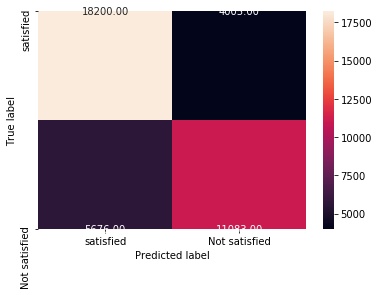

In [90]:
sns.heatmap(knn_cm, annot=True,  fmt='.2f', xticklabels = ["satisfied", "Not satisfied"] , yticklabels = ["satisfied", "Not satisfied"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')